In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [2]:
data = pd.read_csv("data/healthcare-dataset-stroke-data.csv")

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [5]:
data.drop('id',inplace=True,axis=1)

In [6]:
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 
                        'Residence_type', 'smoking_status']
encoders = {}

In [7]:
def age_group(x):
    if x<13: return "Child"
    elif 13<x<20: return "Teenager"
    elif 20<x<=60: return "Adult"
    else: return "Elder"
    
data["age_group"] = data.age.apply(age_group)

def bmi_group(x):
    if x<18.5 : return "UnderWeight"
    elif 18.5<x<25: return "Healthy"
    elif 25<x<30: return "OverWeight"
    else: return "Obese"

data["bmi_group"] = data.bmi.apply(bmi_group);
categorical_features.extend(['age_group', 'bmi_group'])

In [8]:
for each in categorical_features:
    encoders[each] = LabelEncoder()
    data[each] = encoders[each].fit_transform(data[each])

In [9]:
X = data.drop('stroke',axis=1)
y = data['stroke']

In [10]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_group
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1,2,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1,2,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1,0,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1,2,0


In [11]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size =0.2)

In [12]:
x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)
print(x_train_std)
print(x_test_std)

[[-0.84416329  1.31369947  3.02806113 ... -0.34433028  1.11424066
  -0.21965377]
 [-0.84416329  0.30316208 -0.33024432 ...  1.51883607 -0.83944402
   0.9098363 ]
 [ 1.18222515 -0.00439278 -0.33024432 ...  1.51883607 -0.83944402
   0.9098363 ]
 ...
 [-0.84416329 -1.87959869 -0.33024432 ... -1.27591345  0.13739832
   2.03932637]
 [-0.84416329  0.65465334 -0.33024432 ... -0.34433028 -0.83944402
  -0.21965377]
 [ 1.18222515 -1.10280299 -0.33024432 ...  0.5872529   2.09108301
  -1.34914384]]
[[-0.84416329  0.9622082  -0.33024432 ...  0.5872529   1.11424066
  -0.21965377]
 [-0.84416329 -0.97099376 -0.33024432 ...  0.5872529  -0.83944402
   0.9098363 ]
 [-0.84416329  0.21528926 -0.33024432 ... -1.27591345 -0.83944402
   0.9098363 ]
 ...
 [ 1.18222515  1.00614461  3.02806113 ...  0.5872529   1.11424066
  -0.21965377]
 [-0.84416329 -0.92705736 -0.33024432 ...  0.5872529  -0.83944402
  -1.34914384]
 [ 1.18222515 -0.83918454 -0.33024432 ... -0.34433028 -0.83944402
   0.9098363 ]]


In [13]:
columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type','avg_glucose_level', 'bmi', 'smoking_status']
def process_input(x):
    x = pd.DataFrame(x, columns=columns)
    x["bmi_group"] = data.bmi.apply(bmi_group);
    x["age_group"] = data.age.apply(age_group)
    for each in categorical_features:
        x[each] = encoders[each].transform(x[each])
    x = std.transform(x)
    return x
        
x = [['Female', 67.0, 0, 1, 'Yes', 'Self-employed', 'Urban', 228.69, 36.6, 'never smoked']]
x = process_input(x)  

In [14]:
from sklearn.svm import SVC
sv = SVC(probability=True)
sv.fit(x_train_std, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [15]:
y_pred = sv.predict(x_test)
ac_rf = accuracy_score(y_test,y_pred)
print(f"Accuracy of support vector classifier in total dataset: {ac_rf}")
y1 = sv.predict(x)
print(y1)
results = sv.predict_proba(x)
print(results)

Accuracy of support vector classifier in total dataset: 0.9442270058708415
[0]
[[0.95492256 0.04507744]]


In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_std,y_train)
print(dt.feature_importances_)
print(x_train.columns.values)

[0.03701791 0.17555107 0.02697217 0.03075776 0.00956582 0.04599791
 0.02274555 0.32129573 0.22485981 0.08602639 0.0027325  0.01647737]
['gender' 'age' 'hypertension' 'heart_disease' 'ever_married' 'work_type'
 'Residence_type' 'avg_glucose_level' 'bmi' 'smoking_status' 'age_group'
 'bmi_group']


In [17]:
import pickle

In [18]:
classifier = open("classifier.pkl", "wb")
pickle.dump(sv,classifier)
classifier.close()

In [25]:
scaler = open("scaler.pkl", "wb")
pickle.dump(std,scaler)
scaler.close()

In [19]:

e = open("encoders.pkl", "wb")
pickle.dump(encoders,e,protocol=pickle.HIGHEST_PROTOCOL)
e.close()

In [20]:
for j,i in zip(dt.feature_importances_,x_train.columns.values):
    print(f"{i} : {int(j*100)}")

gender : 3
age : 17
hypertension : 2
heart_disease : 3
ever_married : 0
work_type : 4
Residence_type : 2
avg_glucose_level : 32
bmi : 22
smoking_status : 8
age_group : 0
bmi_group : 1


In [21]:
import numpy as np

C:\Users\kabil\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  """


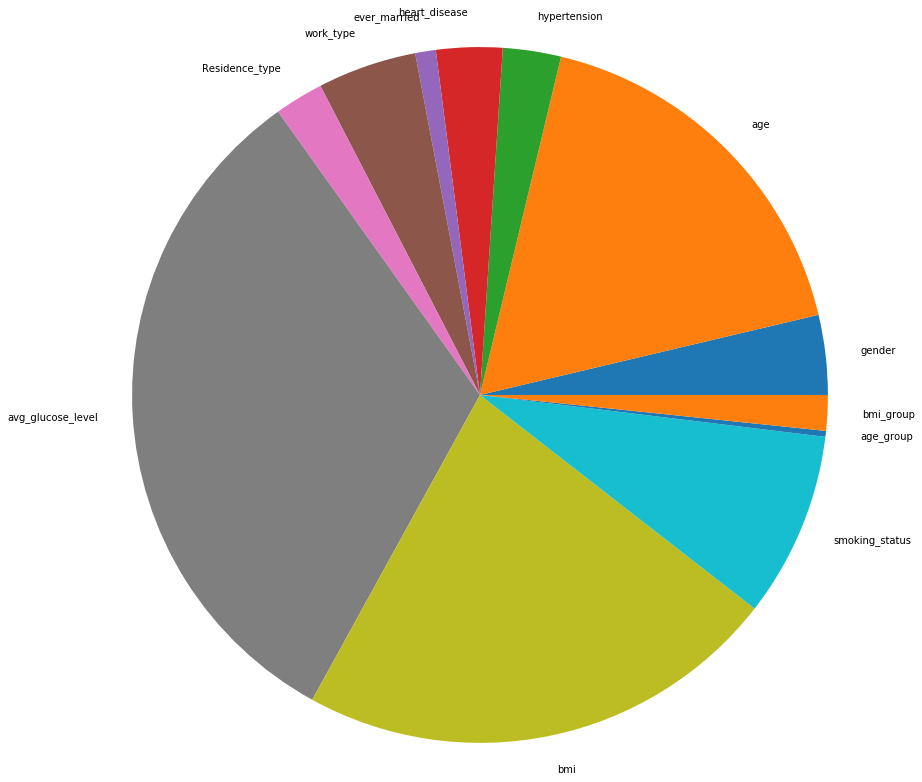

In [22]:

y = np.array(dt.feature_importances_)
mylabels = ["Apples", "Bananas", "Cherries", "Dates"]

plt.pie(y, labels = x_train.columns.values,radius =4.0,textprops={'fontsize':10},)
plt.tight_layout()
plt.show()

C:\Users\kabil\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  app.launch_new_instance()


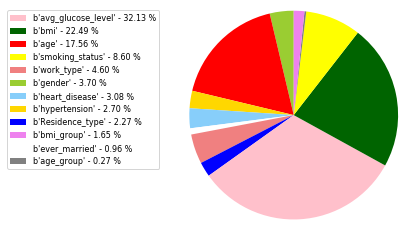

In [23]:

x = np.char.array(x_train.columns.values)
y = np.array(dt.feature_importances_)
colors = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')